# Titanic classification

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer

import sys
sys.path.append('../script/')
from functions import get_catecorials, get_dummies

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Let's see the data

In [5]:
data_train = pd.read_csv('../input/titanic/train.csv')
target = 'Survived'

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some features seems irelevant and not usefull for prediction: `PassengerId`, `Name` and `Ticket`. We should remove them from the dataset.

In [6]:
drop_features = ['PassengerId', 'Name', 'Ticket']
data_train = data_train.drop(drop_features, axis=1)
features = np.setdiff1d(data_train.columns.tolist(), target)

Take a look at the surviving proportion

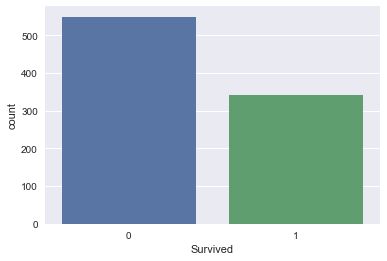

In [7]:
sns.countplot(x=target, data=data_train)

## Missing values

In [8]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
None


As we can see there is lot of missing values for the features `Age` and `Cabin`. Before doing some ML, we must take care of the NaNs. 

In [9]:
categorical_features = get_catecorials(data_train, target)
numerical_features = np.setdiff1d(features, categorical_features)
data_categorical = data_train[categorical_features]
data_numeric = data_train[numerical_features]

In [10]:
print(data_numeric.isnull().sum())
data_numeric.head()

Age       177
Fare        0
Parch       0
Pclass      0
SibSp       0
dtype: int64


,Age,Fare,Parch,Pclass,SibSp
0,22.0,7.2500,0,3,1
1,38.0,71.2833,0,1,1
2,26.0,7.9250,0,3,0
3,35.0,53.1000,0,1,1
4,35.0,8.0500,0,3,0


The variable `Age` has a lot of missing values. We chose to replace these missing values by the median.

In [11]:
data_train["Age"].fillna(data_train["Age"].median(), inplace=True)

In [12]:
print(data_categorical.describe())
data_categorical.head()

       Cabin Embarked   Sex
count    204      889   891
unique   147        3     2
top       G6        S  male
freq       4      644   577


,Cabin,Embarked,Sex
0,NaN,S,male
1,C85,C,female
2,NaN,S,female
3,C123,S,female
4,NaN,S,male


In [13]:
tmp = data_categorical.describe().loc['top']['Embarked']
data_train['Embarked'].fillna(tmp, inplace=True)

In [14]:
data_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

The feature `Cabin` can have an importance on the prediction but for the moment, we chose to drop it from from the prediction.

In [15]:
data_train.drop('Cabin', axis=1, inplace=True)
drop_features.append('Cabin')

In [16]:
features = np.setdiff1d(features, 'Cabin')
categorical_features = np.setdiff1d(categorical_features, 'Cabin')

In [17]:
data_train['Sex'][data_train['Sex'] == 'male'] = 1
data_train['Sex'][data_train['Sex'] == 'female'] = 0

/Users/nicolasbousquet/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nicolasbousquet/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [24]:
data_categorical.drop('Cabin', axis=1, inplace=True)

/Users/nicolasbousquet/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
get_dummies(data_train[categorical_features])

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_0.0,Sex_1.0,Sex_nan
0,0,0,1,0,0,1,0
1,1,0,0,0,1,0,0
2,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0
5,0,1,0,0,0,1,0
6,0,0,1,0,0,1,0
7,0,0,1,0,0,1,0
8,0,0,1,0,1,0,0
9,1,0,0,0,1,0,0
